<a href="https://colab.research.google.com/github/Abhit2763/prodigy1/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',15,'display.width',1000)
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Select only numeric columns before calculating the mean
train.groupby('Survived').mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
# Select only numeric columns before calculating the correlation
numeric_train = train.select_dtypes(include=['number'])
numeric_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
male_ind=len(train[train['Sex']=='male'])
female_ind=len(train[train['Sex']=='female'])
print(male_ind,female_ind)

577 314


<function matplotlib.pyplot.show(close=None, block=None)>

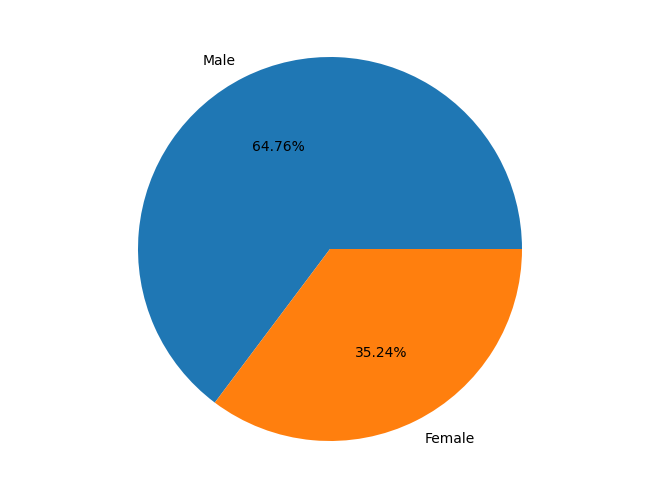

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie([male_ind,female_ind],labels=['Male','Female'],autopct='%1.2f%%')
plt.show

In [ ]:
alive=len(train[train['Survived']==1])
dead=len(train[train['Survived']==0])
print(alive,dead)

342 549


In [ ]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<function matplotlib.pyplot.show(close=None, block=None)>

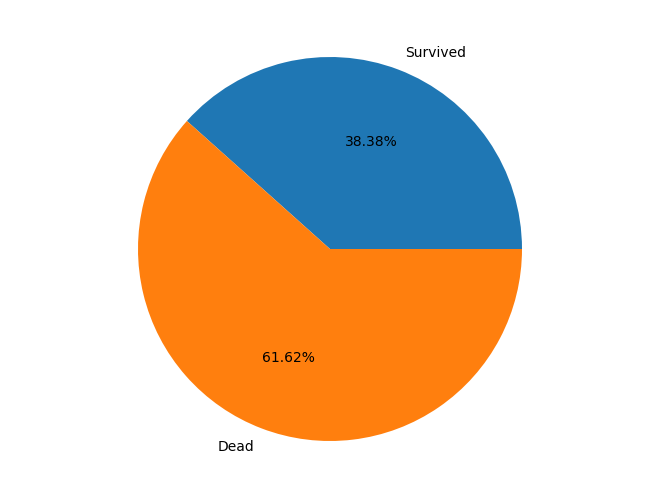

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie([alive,dead],labels=['Survived','Dead'],autopct='%1.2f%%')
plt.show

Text(0.5, 1.0, 'Bar Graph of people acc to Ticket class who could not survive')

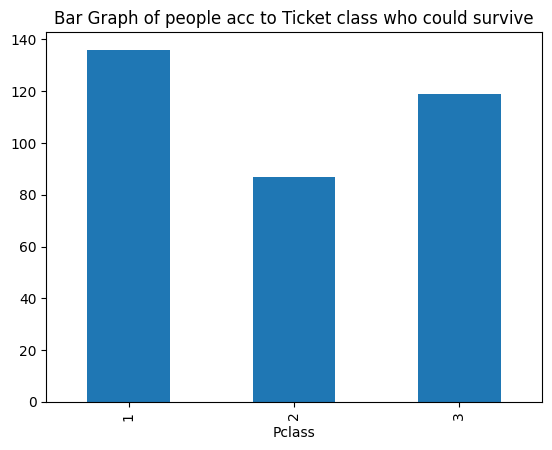

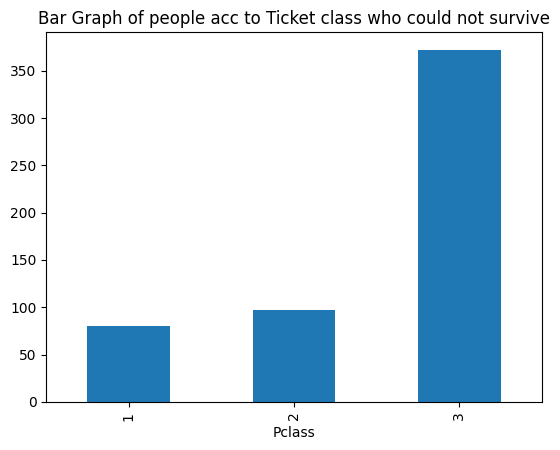

In [ ]:
plt.figure(1)
train.loc[train['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar Graph of people acc to Ticket class who could survive')


plt.figure(2)
train.loc[train['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar Graph of people acc to Ticket class who could not survive')

([<matplotlib.axis.XTick at 0x7e093d3cb820>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

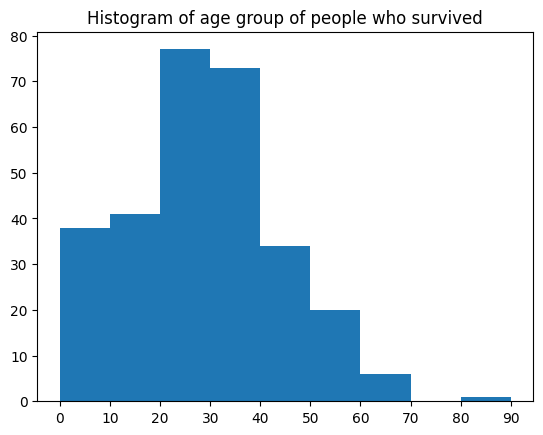

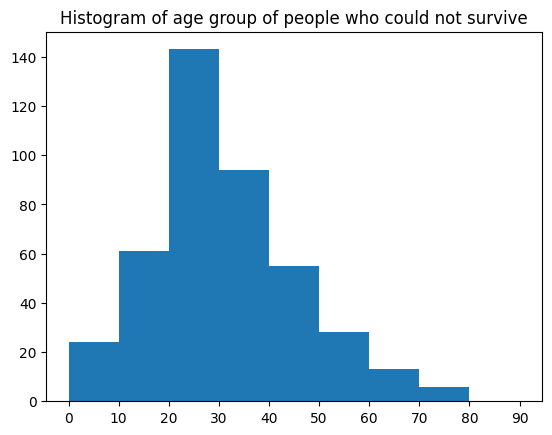

In [ ]:
plt.figure(1)
age=train.loc[train['Survived']==1,'Age']
plt.title('Histogram of age group of people who survived')
plt.hist(age, np.arange(0,100,10)) # Corrected function name to 'arange'
plt.xticks(np.arange(0,100,10)) # Changed 'xsticks' to 'xticks'


plt.figure(2)
age=train.loc[train['Survived']==0,'Age']
plt.title('Histogram of age group of people who could not survive')
plt.hist(age, np.arange(0,100,10)) # Corrected function name to 'arange'
plt.xticks(np.arange(0,100,10)) # Changed 'xsticks' to 'xticks'

In [ ]:
train[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Age","Survived"]].groupby(['Age'],as_index=False).mean().sort_values(by='Age',ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [ ]:
train[["Embarked","Survived"]].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


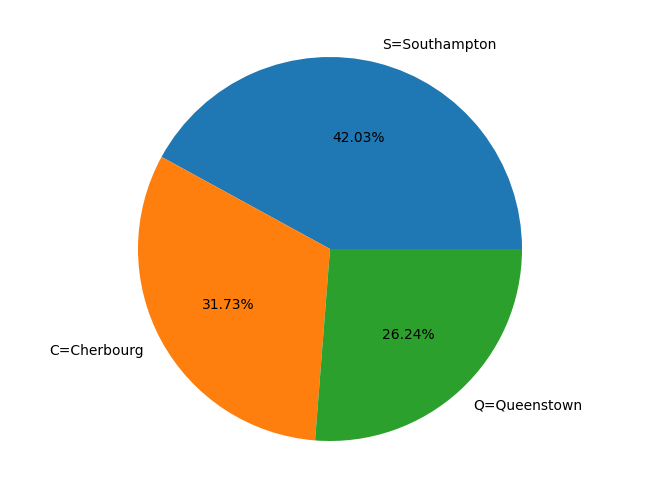

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['S=Southampton','C=Cherbourg','Q=Queenstown']
s=[314,237,196]
ax.pie(s, labels=l,autopct='%1.2f%%')
plt.show()

In [ ]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

In [ ]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [ ]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

In [ ]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X=train[column_train]
Y=train['Survived']

In [ ]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked'] # 'SibSp' was misspelled
X=train[column_train]
Y=train['Survived']

In [ ]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [ ]:
X['Embarked']=X['Embarked'].fillna('S')
X['Embarked'].isnull().sum()

0

In [ ]:
d={'male':0,'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [ ]:
e={'S':0,'C':1,'Q':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))


Accuracy Score: 0.7611940298507462


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)

[[129  27]
 [ 37  75]]


In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.6604477611940298


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print(classification_report(Y_test,Y_pred))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.6567164179104478


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print(classification_report(Y_test,Y_pred))

[[128  28]
 [ 64  48]]
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       156
           1       0.63      0.43      0.51       112

    accuracy                           0.66       268
   macro avg       0.65      0.62      0.62       268
weighted avg       0.65      0.66      0.64       268



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
Y_pred=nb.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7723880597014925


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print(classification_report(Y_test,Y_pred))

[[131  25]
 [ 36  76]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       156
           1       0.75      0.68      0.71       112

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [ ]:
results=pd.DataFrame({
    'Model':['Logistic Regression','Support Vector Machines','KNN','Naive Bayes','KNN','Decision Tree'],
    'Score':[0.75,0.66,0.76,0.66,0,0.74]})

results_df=results.sort_values(by='Score',ascending=False)
results_df=results_df.set_index('Score')
results_df.head(9)

,Model
Score,
0.76,KNN
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,Naive Bayes
0.00,KNN


## **Thank You!!**